<a href="https://colab.research.google.com/github/iKatePy/Study_projects/blob/master/%D0%A0%D0%B0%D0%B7%D0%B2%D0%B5%D0%B4%D0%BE%D1%87%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://adabul.com/wp-content/uploads/2020/04/diziler-360x240.jpg)

## 1. Описание датасета и задания

Представлен датасет с данными о 5000 фильмах, имеющих наибольший рейтинг на сайте IMDb (датасет выложен на платформе [Kaggle](https://www.kaggle.com/datasets/totoro29/imdb-movies)).

***Информация, содержащаяся в датасете:***
1.   Ссылка на постер фильма (poster).
2.   Наименование фильма (title).
3.   Класс фильма по рейтингу the British Board of Film Classification (BBFC) (certificate).
4.   Продолжительность фильма (runtime).
5.   Жанр фильма (genre).
6.   Рейтинг фильма на платформе IMBD (rating).
7.   Описание сюжета фильма (about).
8.   Кинорежиссер фильма (director).
9.   Актеры-звезды фильма (stars).
10.  Количество проголосовавших за фильм (votes).
11.  Доход с фильма (gross_earn).

**Задача** — провести разведочный анализ данных, найти взаимосвязи и сформулировать выводы.

1.   Выполнить неграфический и графический анализ количественных признаков.
2.   Выполнить неграфический и графический анализ категориальных признаков.
3.   Выполнить анализ взаимосвязи двух количественных признаков.
4.   Выполнить анализ взаимосвязи двух категориальных признаков.
5.   Выполнить анализ взаимосвязи количественного и категориального признаков.

****Задания со звездочкой факультативные (дополнительные)***

## 2. Загрузка датасета

Импортируйте модуль files для подгрузки датасета с ПК

In [ ]:
from google.colab import files

Загрузите файл movies_clean.csv (сохранен по итогу выполнения предыдущего задания) с помощью files.upload()

In [ ]:
files.upload()

Saving movies_clean.csv to movies_clean.csv


{'movies_clean.csv': b',poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn,runtime_clear,gross_earn_clear\n0,https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png,The Shawshank Redemption,15,142 min,Drama,9.3,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",Frank Darabont,"(\'Tim Robbins\',), (\'Morgan Freeman\',), (\'Bob Gunton\',), (\'William Sadler\',)","26,26,905",$28.34M,142,28.34\n1,https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png,Hababam Sinifi,12A,87 min,"Comedy, Drama",9.2,"Lazy, uneducated students share a very close bond. They live together in the dormitory, where they plan their latest pranks. When a new headmaster arrives, the students naturally try to overthrow him. A comic war of nitwits follows.",Ertem Egilmez,"(\'Kemal Sunal\',), (\'M\xc3\xbcnir \xc3\x96zkul\',), (\'Halit Ak\xc3\xa7atepe\',), (\'Tarik Akan\',)","40,492",,87,\n2,https://m.media-ama

## 3. Подгрузка данных в питон и начало работы с ними

Импортируйте библиотеку pandas и присвойте ей короткое название pd

In [ ]:
import pandas as pd

Откройте датасет movies_clean.csv и сохраните его в переменную dataset

In [ ]:
dataset = pd.read_csv('movies_clean.csv')

Проведите обзор таблицы с помощью метода head()

In [ ]:
dataset.head()

,Unnamed: 0,poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn,runtime_clear,gross_earn_clear
0,0,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Shawshank Redemption,15,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,"('Tim Robbins',), ('Morgan Freeman',), ('Bob G...","26,26,905",$28.34M,142,28.34
1,1,https://m.media-amazon.com/images/S/sash/4Fyxw...,Hababam Sinifi,12A,87 min,"Comedy, Drama",9.2,"Lazy, uneducated students share a very close b...",Ertem Egilmez,"('Kemal Sunal',), ('Münir Özkul',), ('Halit Ak...","40,492",NaN,87,NaN
2,2,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Godfather,X,175 min,"Crime, Drama",9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"('Marlon Brando',), ('Al Pacino',), ('James Ca...","18,19,641",$134.97M,175,134.97
3,3,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Godfather: Part II,X,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,"('Al Pacino',), ('Robert De Niro',), ('Robert ...","12,49,182",$57.30M,202,57.30
4,4,https://m.media-amazon.com/images/S/sash/4Fyxw...,Schindler's List,15,195 min,"Biography, Drama, History",9.0,"In German-occupied Poland during World War II,...",Steven Spielberg,"('Liam Neeson',), ('Ralph Fiennes',), ('Ben Ki...","13,33,407",$96.90M,195,96.90


Удалите столбец 'Unnamed: 0' как ненужный с помощью метода drop(), передав в него параметры columns и inplace=True

In [ ]:
dataset.drop(columns='Unnamed: 0', inplace=True)

## 4. Оценка размеров датасета, выбор признаков для анализа

Оцените размеры датасета с помощью атрибута shape

In [ ]:
dataset.shape

(4970, 13)

Выведите информацию о датасете с помощью метода info()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   poster            4970 non-null   object 
 1   title             4970 non-null   object 
 2   certificate       4970 non-null   object 
 3   runtime           4970 non-null   object 
 4   genre             4970 non-null   object 
 5   rating            4970 non-null   float64
 6   about             4956 non-null   object 
 7   director          4970 non-null   object 
 8   stars             4970 non-null   object 
 9   votes             4970 non-null   object 
 10  gross_earn        4574 non-null   object 
 11  runtime_clear     4970 non-null   int64  
 12  gross_earn_clear  4574 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 504.9+ KB


**Признаки, которые будут использованы для дальнейшего анализа:**

***Количественные признаки:***
1.   Продолжительность фильма: runtime_clear
2.   Доход с фильма: gross_earn_clear

***Категориальные признаки:***
1.   Наименование фильма: title
2.   Класс фильма: certificate
3.   Жанр фильма: genre
4.   Рейтинг фильма: rating
5.   Кинорежиссер: director
6.   Актеры-звезды фильма: stars


## 5. Неграфический и графический анализ количественных признаков

Выполните неграфический и графический анализ количественных признаков

### *5.1. gross_earn_clear*

Сохраните Series ['gross_earn_clear'] в переменную gross_earn

In [ ]:
gross_earn = dataset['gross_earn_clear']

Рассчитайте максимальное и минимальное значения доходов с фильмов с помощью методов max() и min() соответственно. Выведите значения на печать

In [ ]:
max_value = gross_earn.max()
min_value =gross_earn.min()
print('Наибольший доход: ', max_value, 'Наименьший доход: ', min_value)

Наибольший доход:  936.66 Наименьший доход:  0.0


Рассмотрите наблюдения, у которых значение по признаку gross_earn равно 0.0

In [ ]:
dataset[dataset['gross_earn_clear']==0.0]

,poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn,runtime_clear,gross_earn_clear
540,https://m.media-amazon.com/images/S/sash/4Fyxw...,Mr. Nobody,15,141 min,"Drama, Fantasy, Romance",7.8,A boy stands on a station platform as a train ...,Jaco Van Dormael,"('Jared Leto',), ('Sarah Polley',), ('Diane Kr...","2,32,030",$0.00M,141,0.0
736,https://m.media-amazon.com/images/S/sash/4Fyxw...,Adam's Apples,R,94 min,"Comedy, Crime, Drama",7.7,A neo-Nazi sentenced to community service at a...,Anders Thomas Jensen,"('Ulrich Thomsen',), ('Mads Mikkelsen',), ('Ni...","50,694",$0.00M,94,0.0
1381,https://m.media-amazon.com/images/S/sash/4Fyxw...,Pusher,18,110 min,"Crime, Thriller",7.3,A drug pusher grows increasingly desperate aft...,Nicolas Winding Refn,"('Kim Bodnia',), ('Zlatko Buric',), ('Laura Dr...","39,929",$0.00M,110,0.0
1453,https://m.media-amazon.com/images/S/sash/4Fyxw...,Ben X,15,93 min,"Drama, Thriller",7.3,As an alternative to getting bullied at school...,Nic Balthazar,"('Marijke Pinoy',), ('Greg Timmermans',), ('Ce...","18,943",$0.00M,93,0.0
1567,https://m.media-amazon.com/images/S/sash/4Fyxw...,Nothing But the Truth,15,108 min,"Crime, Drama",7.2,"In Washington, D.C., a reporter faces a possib...",Rod Lurie,"('Kate Beckinsale',), ('Matt Dillon',), ('Vera...","38,253",$0.00M,108,0.0
2120,https://m.media-amazon.com/images/S/sash/4Fyxw...,Perfect Sense,15,92 min,"Drama, Romance, Sci-Fi",7.0,A chef and a scientist fall in love as an epid...,David Mackenzie,"('Ewan McGregor',), ('Eva Green',), ('Lauren T...","60,249",$0.00M,92,0.0
2364,https://m.media-amazon.com/images/S/sash/4Fyxw...,Ginger Snaps,18,108 min,"Drama, Fantasy, Horror",6.8,"Two death-obsessed sisters, outcasts in their ...",John Fawcett,"('Emily Perkins',), ('Katharine Isabelle',), (...","47,082",$0.00M,108,0.0
3153,https://m.media-amazon.com/images/S/sash/4Fyxw...,Son of a Gun,15,108 min,"Action, Crime, Drama",6.4,"JR busts out of prison with Brendan Lynch, Aus...",Julius Avery,"('Ewan McGregor',), ('Brenton Thwaites',), ('A...","28,121",$0.00M,108,0.0
3332,https://m.media-amazon.com/images/S/sash/4Fyxw...,Flypaper,15,87 min,"Comedy, Crime, Mystery",6.3,A man caught in the middle of two simultaneous...,Rob Minkoff,"('Patrick Dempsey',), ('Ashley Judd',), ('Tim ...","33,003",$0.00M,87,0.0
3638,https://m.media-amazon.com/images/S/sash/4Fyxw...,Chalet Girl,12A,97 min,"Comedy, Romance, Sport",6.2,Former skateboard champion Kim wants to make m...,Phil Traill,"('Felicity Jones',), ('Ed Westwick',), ('Bill ...","25,470",$0.00M,97,0.0


Таких значений не так много. Можно их исключить из анализа. Перезапишите переменную gross_earn, исключив нулевые значения

In [ ]:
gross_earn = dataset[dataset['gross_earn_clear']!=0.0]['gross_earn_clear']

Снова рассчитайте максимальное и минимальное значения доходов с фильмов. Выведите значения на печать

In [ ]:
max_value = gross_earn.max()
min_value = gross_earn.min()
print('Наибольший доход: ', max_value, 'Наименьший доход: ', min_value)

Наибольший доход:  936.66 Наименьший доход:  0.01


Рассчитайте среднее значение признака с помощью метода mean(). Выведите значение на печать

In [ ]:
mean_value = gross_earn.mean()
print('Средний доход с фильма: ', mean_value)

Средний доход с фильма:  49.07882623957876


Рассчитайте медианное значение признака с помощью метода median(). Выведите значение на печать

In [ ]:
median_value = gross_earn.median()
print('Медиана доходов фильмов: ', median_value)

Медиана доходов фильмов:  28.345


Рассчитайте процентили (10, 25, 50, 75, 90) с помощью метода quantile(). Выведите значения на печать

In [ ]:
percentile_10_value = gross_earn.quantile(0.10)
percentile_25_value = gross_earn.quantile(0.25)
percentile_50_value = gross_earn.quantile(0.50)
percentile_75_value = gross_earn.quantile(0.75)
percentile_90_value = gross_earn.quantile(0.90)
print('10-й процентиль доходов фильмов: ', percentile_10_value)
print('25-й процентиль доходов фильмов: ', percentile_25_value)
print('50-й процентиль доходов фильмов: ', percentile_50_value)
print('75-й процентиль доходов фильмов: ', percentile_75_value)
print('90-й процентиль доходов фильмов: ', percentile_90_value)

10-й процентиль доходов фильмов:  0.7970000000000005
25-й процентиль доходов фильмов:  7.0
50-й процентиль доходов фильмов:  28.345
75-й процентиль доходов фильмов:  63.04
90-й процентиль доходов фильмов:  121.96800000000002


Выведите показатели описательной статистики с помощью метода describe()

In [ ]:
gross_earn.describe()

,gross_earn_clear
count,4558.000000
mean,49.078826
std,67.171717
min,0.010000
25%,7.000000
50%,28.345000
75%,63.040000
max,936.660000


Импортируйте библиотеку matplotlib с расширением pyplot, присвоив короткое название plt

In [ ]:
import matplotlib.pyplot as plt


Постройте диаграмму "ящик с усами" с помощью метода boxplot()

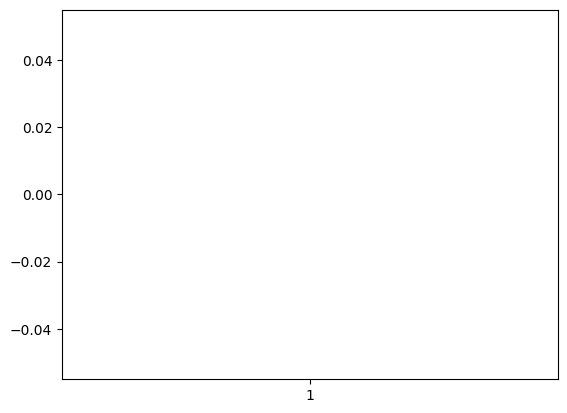

In [ ]:
plt.boxplot(gross_earn)
plt.show()

Диаграмма пустая.  Это связано с наличием пропущенных значений по признаку.
Очистите клонку от пустых значений с помощью dropna и попробуйте заново построить "ящик с усами"

In [ ]:
gross_earn_without_na = gross_earn.dropna()


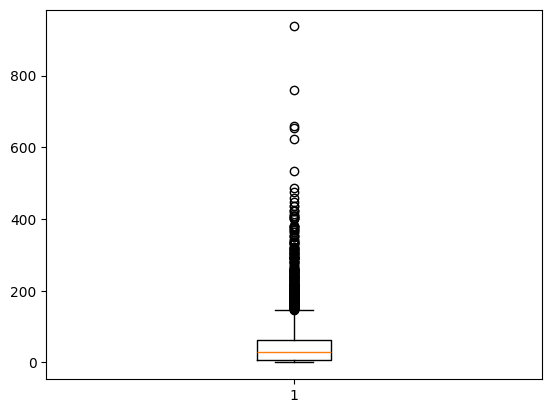

In [ ]:
plt.boxplot(gross_earn_without_na)
plt.show()

<br>Попробуйте построить гистограмму с помощью метода hist(), чтобы посмотреть на распределение признака.

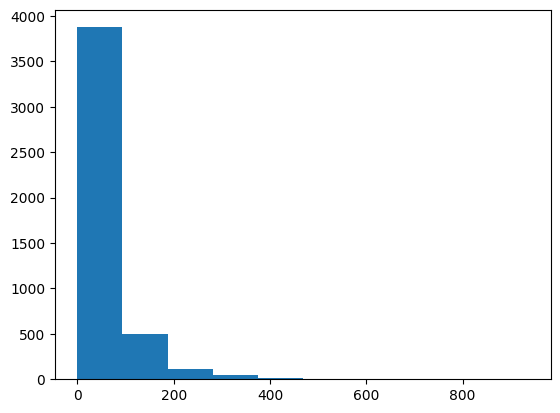

In [ ]:
plt.hist(gross_earn_without_na)
plt.show()

Гистограмма показывает, достаточно большой размах в данных, что подтверждается и показателями описательной статистики (min и max). Ограничьте графический анализ 10 процентилем снизу и 90 процентилем сверху, тем самым обработав часть выбросов, и заново постройте гистограмму передав в нее параметр bins=20 для лучшей визуализации

In [ ]:
gross_earn_2 = dataset[
    (dataset['gross_earn_clear']>=percentile_10_value)&
    (dataset['gross_earn_clear']<=percentile_90_value)]['gross_earn_clear']

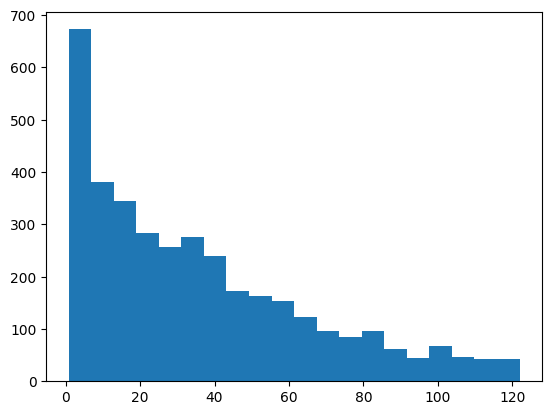

In [ ]:
plt.hist(gross_earn_2, bins=20)
plt.show()

**Выводы:**

Напишите выводы по разделу:
1.   О максимальных и минимальных значениях признака (оцените размах значений).
2.   О нулевых значениях (их наличие, нужна ли предобработка).
3.   О средних величинах (среднее, медиана, их отличия, возможные причины).
4.   О процентилях (сколько процентов данных не превышают то или иное значение).
5.   О результатах графического анализа (необходимость исключения выбросов, что показывает "ящик с усами", что показывает гистограмма).

1 Размах максимального и минимального значений дохода достаточно большой - от  936 миллионов до 0.01.
2 Нулевых значений найдено мало, всего 16 из общего массива данных, поэтому они были исключены.
3 Среднее значение показало около 49 млн, медианное 28. Такое различие среднего и медианного значений указывает на
наличие выбросов в данных, которые увеличивают среднее значение. В данном случае, высокие значения (например, 936 млн)
могут значительно влиять на среднее, тогда как большая часть данных находится в более низком диапазоне.
4 10% фильмов имеют доход ниже 0.797, 25% фильмов имеют доход ниже 7.0, 50% фильмов имеют доход ниже 28.345, 75% фильмов имеют доход ниже 63.04, 90% фильмов имеют доход ниже 121.968. Таким образом, большАя часть фильмов имеет низкий доход. Между 25-м и 50-м процентилями значителен прирост дохода, что указывает на то, что хотя бы половина фильмов имеет доходы выше среднего уровня для первой четверти. Верхняя четверть фильмов имеет значительно более высокие доходы, чем остальные. Высокий показатель для 90-нр процентиля говорит о наличии нескольких фильмов с высокими доходами, которые можно отнести к выбросам и которые оказывают влияние на среднее значение, повышая его по отношению к медианному. Анализ процентилей показывает, что большинство фильмов имеют низкие или средние доходы, а лишь небольшая часть достигает высоких результатов.
5 Медианное значение в 28 млн показывает, что половина фильмов будет иметь доход меньше этого, а половина - больше, что и видно на boxplot, а именно видно большой разброс значений в диапазоне от 150 до 900, при этом наблюдается "кучность" значений фильмов с меньшим бюджетом. Ввиду наличия большого количества выбросов, картинка на гистограмме получалась малоинформативной, в связи с чем пришлось удалять значения. После удаления значений и уменьшения ширины колонок график стал более информативным.

### **5.2. runtime_clear*

По аналогии проанализируйте продолжительность фильмов

## 6. Неграфический и графический анализ категориальных признаков

Выполните неграфический и графический анализ категориальных признаков

### *6.1. certificate*

Описание классификации [the British Board of Film Classification (BBFC)]( https://www.bbfc.co.uk/about-classification/classification-guidelines)

Оцените описательные статистики признака с помощью метода describe()

In [ ]:
dataset['certificate'].describe()

,certificate
count,4970
unique,15
top,15
freq,1843


Изучите уникальные значения признака, получив их с помощью метода unique()

In [ ]:
dataset['certificate'].unique()

array(['15', '12A', 'X', 'U', '18', 'PG', '12', 'A', 'AA', 'R',
       'Not Rated', 'Rejected', 'UA', 'PG-13', '(Banned)'], dtype=object)

Проведите неграфический структурный анализ с помощью метода value_counts()

In [ ]:
dataset['certificate'].value_counts()

,count
certificate,
15,1843
12A,788
18,659
PG,614
U,362
12,278
A,186
X,134
AA,59


Сохраните результаты работы метода value_counts() в переменную certificate_counts, отсортировав значения с помощью метода sort_values(), передав в него параметр (ascending=True) (это необходимо для того, чтобы впоследствии столбчатая диаграмма сортировала значения сверху вниз: наибольшее - сверху, наименьшее - снизу)

In [ ]:
certificate_counts = dataset['certificate'].value_counts().sort_values(ascending=True)

Постройте горизонтальную столбчатую диаграмму с помощью метода barh()

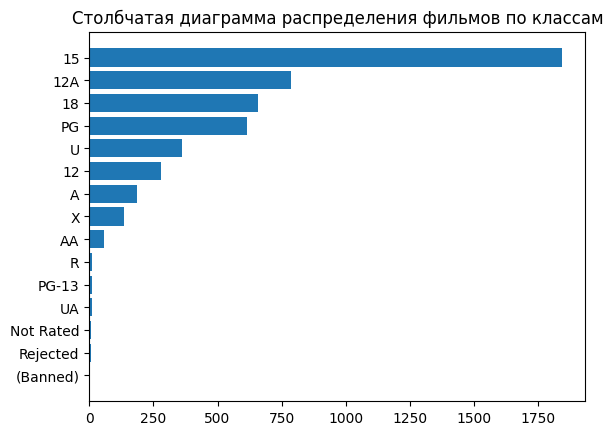

In [ ]:
plt.barh(certificate_counts.index, certificate_counts.values)
plt.title('Столбчатая диаграмма распределения фильмов по классам')
plt.show()

Выделите топ-5 классов, по которым больше всего фильмов и сохраните результат в переменную certificate_counts_top_5

In [ ]:
certificate_counts_top_5 = dataset['certificate'].value_counts()[:5]

Постройте круговую диаграмму с помощью метода pie(), добавив подписи данных с помощью параметра labels и подписи значений с помощью параметра autopct='%.1f' (проценты с одним знаком после запятой)

P.s. При анализе категориальных признаков если категорий не больше 5, то предпочтительна круговая диаграмма, в ином случае - столбчатая

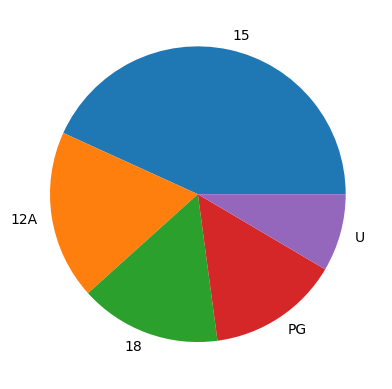

In [ ]:
plt.pie(certificate_counts_top_5.values, labels = certificate_counts_top_5.index)
plt.show()

**Выводы:**

Напишите выводы по разделу:
1.   О количестве уникальных значений признака.
2.   О наиболее часто встречаемом значении признака (что за значение, сколько раз встретилось).
3.   О распределении значений признака (наиболее встречаемые, наименее встречаемые).
4.   О результатах графического анализа определенного топ признака (что показывает столбчатая и круговая диаграммы).






1. Имеется 13 уникальных значений сертификации фильмов(отдельно представлены недопущенный к показам фильм и фильмы со статусом "отказ"). Это говорит о разнообразии категорий, в которые могут быть отнесены фильмы в зависимости от их содержания и возрастных ограничений.
2. Наиболее часто встречаемым значением является 12A, которое встречается 788 раз. Это значение указывает на то, что фильмы с этой сертификацией предназначены для зрителей старше 12 лет, но могут быть просмотрены детьми младшего возраста с разрешением родителей.
3.     Наиболее встречаемые значения:
        12A: 788
        18: 659
        PG: 614

Эти значения показывают, что большинство фильмов имеют сертификацию, позволяющую их просмотр широкой аудитории, включая подростков и взрослых.    Наименее встречаемые значения:
        (Banned): 1
        Rejected: 5
        Not Rated: 7

Эти категории показывают, что очень небольшое количество фильмов не получило сертификацию или было запрещено.
4. Результаты графического анализа топ-признака
Для визуализации распределения сертификаций можно использовать столбчатую и круговую диаграммы.
Столбчатая диаграмма позволяет наглядно увидеть количество фильмов в каждой категории сертификации. Она показывает, какие категории наиболее популярны и как они соотносятся друг с другом. Например, столбцы для сертификаций 12A, 18 и PG будут значительно выше, чем для менее распространённых категорий, таких как (Banned) или Rejected.
Круговая диаграмма иллюстрирует долю каждой категории в общем количестве фильмов. Она позволяет быстро оценить, какая часть фильмов попадает в каждую категорию сертификации. Например, если большая часть круговой диаграммы будет занята категориями 12A, 18 и PG, это будет свидетельствовать о том, что эти категории доминируют на рынке.


### **6.2. rating*

По аналогии проанализируйте рейтинг фильмов

### **6.3. director*

По аналогии проанализируйте кинорежиссеров

---



## 7. Анализ взаимосвязи двух количественных признаков

Выполните анализ взаимосвязи двух количественных признаков

### *7.1. runtime_clear - gross_earn_clear*

Импортируйте библиотеку seaborn и присвойте ей короткое название sns

In [ ]:
import seaborn as sns

Постройте диаграмму совместного распределения двух количественных переменных с помощью функции jointplot(), передав параметры size и alpha для улучшения визуализации

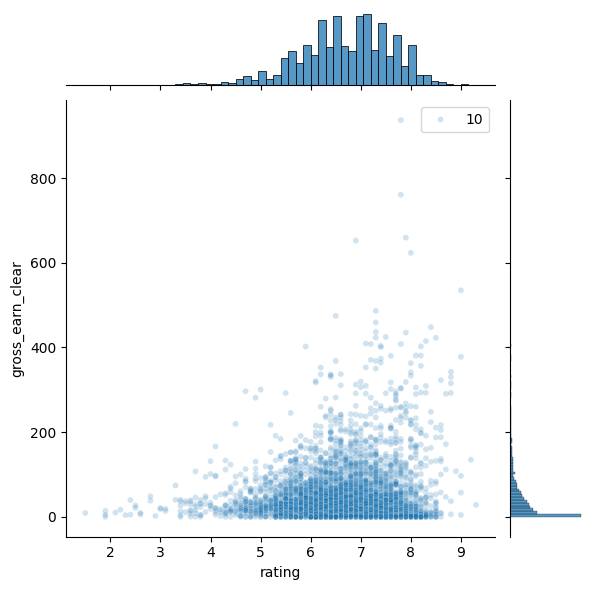

In [ ]:
sns.jointplot(x=dataset['rating'], y=dataset['gross_earn_clear'],size=10, alpha=0.2)
plt.show()

Сохраните колонки 'runtime_clear' и 'gross_earn_clear' в переменную columns и постройте диаграммы рассеяния, используя функции PairGrid(), map() и метод scatterplot, передав параметр alpha для улучшения визуализации

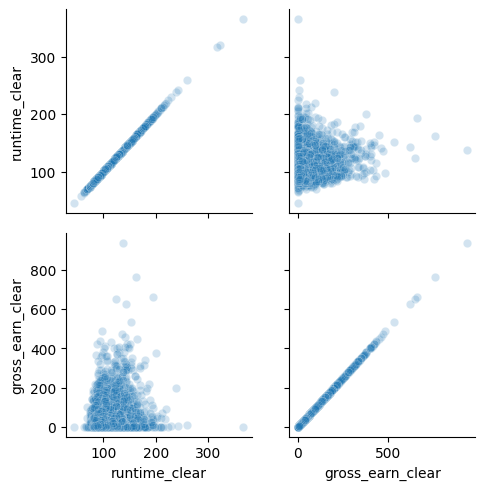

In [ ]:
columns = ['runtime_clear', 'gross_earn_clear']
g = sns.PairGrid(dataset[columns])
g.map(sns.scatterplot, alpha=0.2)

Исключите выбросы, отфильтровав датасет по 99% процентилю. Для этого сохраните копию исходного датасета в переменную new_dataset с помощью метода copy(). Для каждой колонки в columns ограничьте значения 99% процентилем с помощью метода quantile(), сохраняя объект Series в переменную limiter и фильтруя new_dataset по данному ограничению с помощью оператора <=

In [ ]:
new_dataset = dataset.copy()
for col in columns:
  limiter = new_dataset[col].quantile(0.99)
  new_dataset = new_dataset[new_dataset[col] <= limiter]

Постройте диаграммы рассеяния по данным датасета new_dataset, используя функции PairGrid(), map() и метод scatterplot, передав параметр alpha для улучшения визуализации

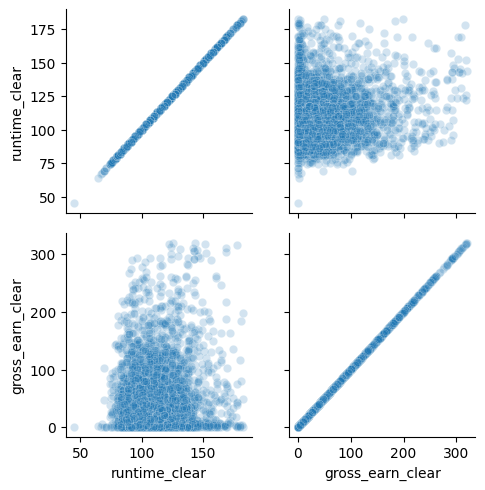

In [ ]:
g = sns.PairGrid(new_dataset[columns])
g.map(sns.scatterplot, alpha=0.2)

**Выводы:**

Напишите выводы по разделу:
1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, какая взаимосвязь (линейная, нелинейная)).

Взаимосвязь между признаками длительность фильма и его доходность слабая, заметно, что высокую доходность могут иметь как и стандартные фильмы по 1.5 - 2 часа, так и фильмы, которые дольше или меньше этих параметров. Линейной взаимосвязи не наблюдается

## 8. Анализ взаимосвязи двух категориальных признаков

Выполните анализ взаимосвязи двух категориальных признаков

### *8.1. director - certificate*

Сохраните уникальные значения признака 'director', определенные с помощью метода unique(), в переменную directors и определите их количество с помощью функции len()

In [ ]:
directors = dataset['director'].unique()
len(directors)

1954

Проведите неграфический структурный анализ признака с помощью метода value_counts()

In [ ]:
dataset['director'].value_counts()

,count
director,
Woody Allen,38
Clint Eastwood,27
Steven Spielberg,27
Alfred Hitchcock,24
Ridley Scott,21
...,...
Sebastian Schipper,1
Jerry Zaks,1
Kinji Fukasaku,1


Определите топ-5 кинорежиссеров с помощью метода value_counts() и среза, выведите их список при помощи атрибута index и сохраните его в переменную directors_top_5

In [ ]:
directors_top_5 = dataset['director'].value_counts()[:5].index
directors_top_5

Index(['Woody Allen', 'Clint Eastwood', 'Steven Spielberg', 'Alfred Hitchcock',
       'Ridley Scott'],
      dtype='object', name='director')

Для корректного визуального представления распределения признака 'certificate' создайте словарь, в котором каждому классу будет присвоен соответствующий цвет из выбранной цветовой палитры tab20. Для этого в переменную labels сохраните уникальные значения признака, затем в переменную colors сохраните словарь, сформированный с помощью функции dict() из объединенных (с помощью функции zip()) попарно значения классов, сохраненных в переменной labels, и цветов из палитры tab20, выбранных по длине (len()) labels, с помощью выражения plt.cm.tab20.colors

In [ ]:
labels = dataset['certificate'].unique()
colors = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))
colors

{'15': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 '12A': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 'X': (1.0, 0.4980392156862745, 0.054901960784313725),
 'U': (1.0, 0.7333333333333333, 0.47058823529411764),
 '18': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'PG': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 '12': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'A': (1.0, 0.596078431372549, 0.5882352941176471),
 'AA': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'R': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 'Not Rated': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'Rejected': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 'UA': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'PG-13': (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 '(Banned)': (0.4980392156862745, 0.4980392156862745, 0.49803

Для каждого кинорежиссера из топ-5 (directors_top_5) постройте круговые диаграммы с помощью метода pie(). Для этого отфильтруйте исходный датасет признаку director и сохраните его в переменную df; сохраните топ-5 классов фильмов (certificate), определенных с помощью метода value_counts() и среза, в переменную certificate_counts; выведите список уникальных значений топ-5 классов с помощью атрибута index и сохраните его в переменную labels; в качестве названия диаграммы передайте кинорежиссера с помощью метода title(); постройте диаграмму, передав в нее в качестве параметров значения (values), подписи (labels), цвета (colors) и подписи значения в виде процентов autopct='%.1f'

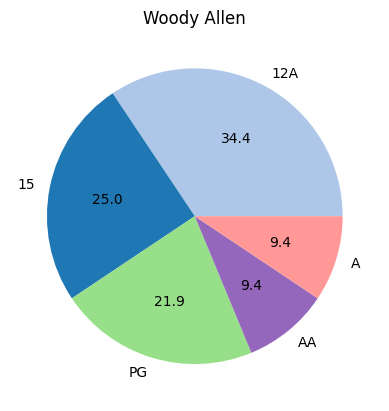

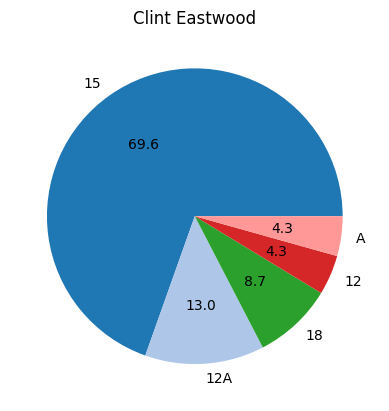

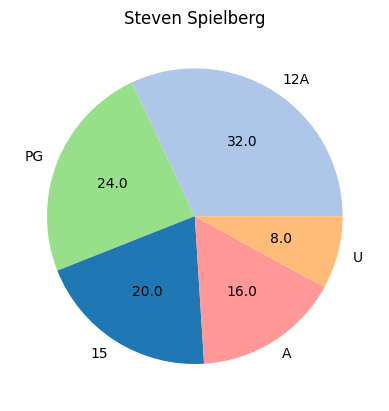

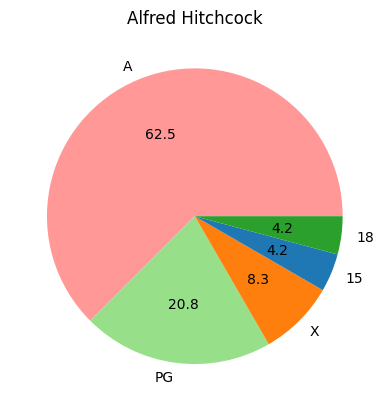

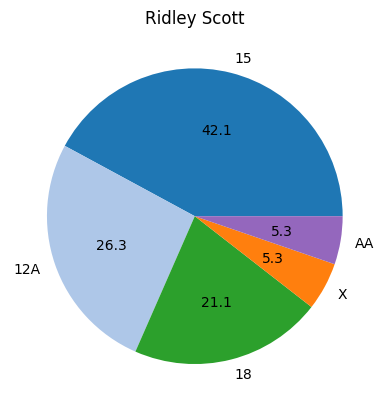

In [ ]:
for director in directors_top_5:
  df = dataset[dataset['director']==director]

  certificate_counts = df['certificate'].value_counts()[:5]
  labels = certificate_counts.index

  plt.title(director)
  plt.pie(certificate_counts, labels=labels, colors=[colors[label] for label in labels], autopct='%.1f')
  plt.show()

**Выводы:**

Напишите выводы по разделу:
1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, похожи ли распределения признаков).
2.   Об особенностях распределения признака в разрезе основного признака (что характерно для каждого значения основного признака)

1 Исходя из полученных круговых диаграмм, можно понять, что каждый режиссер имеет свою аудиторию, на которой он фокусируется, это видно по тому как распределяются классы фильмов для различных режиссеров. Таким образом, связь режиссер - сертификат присутствует, хотя и не прямая, так как режиссеры в основном снимают фильмы под определенную аудиторию, а уже аудитория подходит под определенный сертификат.
2 Для некоторых режиссеров распределение сертификатов выглядят схожим, что может говорить о том, что они работают в схожих жанрах или нацелены на одну и ту же аудиторию. В то же время, значительные различия в распределениях могут указывать на уникальные подходы каждого режиссера к созданию фильмов.

### **8.2. director - rating*

По аналогии проанализируйте взаимосвязь между рейтингом фильмов и кинорежиссерами

### **8.3. certificate - rating*

По аналогии проанализируйте взаимосвязь между классами фильмов и их рейтингом

## 9. Анализ взаимосвязи количественного и категориального признаков

Выполните анализ взаимосвязи категориального и количественного признаков

### *9.1. certificate - gross_earn_clear*

Оцените медианные значения доходов с фильмов в разрезе классов фильмов. Для этого сгруппируйте датасет по признаку certificate с помощью метода groupby и к Series ['gross_earn_clear'] метод median()

In [ ]:
dataset.groupby('certificate')['gross_earn_clear'].median()

,gross_earn_clear
certificate,
(Banned),NaN
12,41.580
12A,42.650
15,18.840
18,14.945
A,16.140
AA,27.620
Not Rated,0.060
PG,44.340


Оцените описательные статистики доходов с фильмов в разрезе классов фильмов, также сгруппировав таблицу и применив метод describe()

In [ ]:
dataset.groupby('certificate')['gross_earn_clear'].describe()

,count,mean,std,min,25%,50%,75%,max
certificate,,,,,,,,
(Banned),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,269.0,60.113048,66.805332,0.04,20.5500,41.580,72.220,659.33
12A,757.0,77.310925,100.261041,0.00,15.2700,42.650,95.000,936.66
15,1719.0,33.451798,42.503809,0.00,3.6100,18.840,45.870,363.07
18,600.0,26.607200,34.639021,0.00,2.5375,14.945,36.875,370.78
A,126.0,37.906190,50.157244,0.01,3.3925,16.140,51.245,260.00
AA,52.0,38.855769,37.479422,0.02,7.2700,27.620,57.635,139.88
Not Rated,5.0,3.830000,8.231376,0.01,0.0200,0.060,0.510,18.55
PG,581.0,64.011360,66.772893,0.01,18.6000,44.340,81.060,402.45


Постройте диаграммы "ящик с усами" с помощью метода boxplot(), передав в качестве x - значения классов, а в качестве y - доход с фильмов

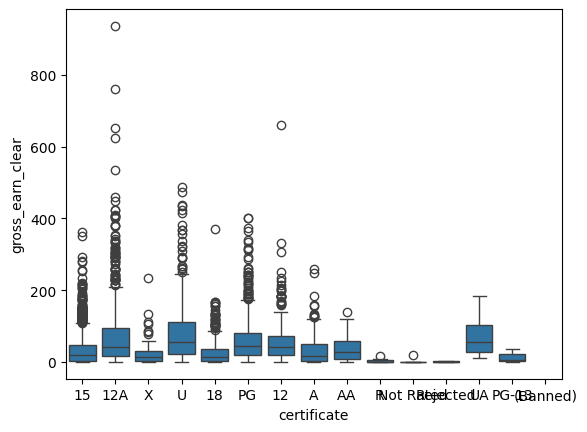

In [ ]:
sns.boxplot(x='certificate', y='gross_earn_clear', data=dataset)
plt.show()

Диаграмма получилась малоинформативна в связи с наличием выбросов, а также ее нагруженностью по количеству значений классов. Оцените количество значений классов с помощью метода value_counts()

In [ ]:
dataset['certificate'].value_counts()

,count
certificate,
15,1843
12A,788
18,659
PG,614
U,362
12,278
A,186
X,134
AA,59


По итогу оценки видно, что крупных классов - 8, поэтому ограничим диаграмму топ-8 классов. Для этого сохраните список топ-8 классов, определенный с помощью метода value_counts(), среза и атрибута index, в переменную certificate_list

In [ ]:
certificate_list = dataset['certificate'].value_counts()[:8]
certificate_list

,count
certificate,
15,1843
12A,788
18,659
PG,614
U,362
12,278
A,186
X,134


Отфильтруйте исходный датасет по признаку certificate с помощью метода isin() и сохраните его в переменную dataset_certificate_top_8. Оцените размеры датасета с помощью атрибута shape

In [ ]:
dataset_certificate_top_8 = dataset[dataset['certificate'].isin(certificate_list)]
dataset_certificate_top_8.shape

(0, 13)

Постройте диаграммы "ящик с усами" с помощью метода boxplot(), передав в качестве x - значения классов, а в качестве y - доход с фильмов, при этом ограничив значение оси y на отметке 25000 с помощью функции plt.axis() и параметров ymin и ymax (если при очистке признака gross_earn от лишних знаков была сохранена исходная размерность, например, 25.40, то ограничьте значение оси y на отметке 250)

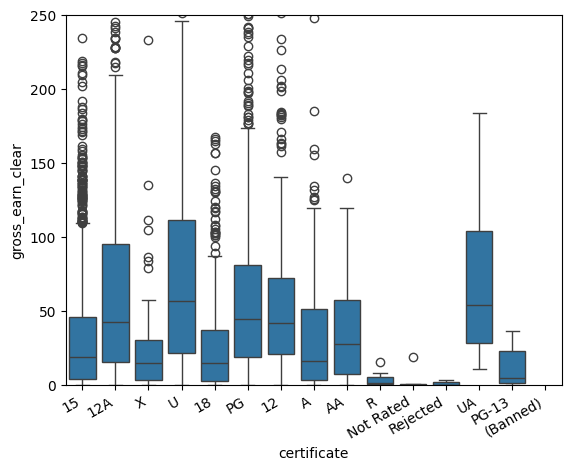

In [ ]:
sns.boxplot(x='certificate', y='gross_earn_clear', data=dataset)
plt.axis(ymin=0, ymax=250)
plt.xticks(rotation=30, ha = 'right')
plt.show()

**Выводы:**

Напишите выводы по разделу:
1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, похожи ли распределения признаков).
2.   Об особенностях распределения признака в разрезе основного признака (что характерно для каждого значения основного признака).
3.   О средних величинах (как распределена медиана).

На диаграммах представлены 2 признака - рейтинг фильма и кассовые сборы. Распределение кассовых сборов значительно меняется в зависимости от рейтинга фильмов. Наапример, рейтинг PG показывает высокое медианное значение по сравнению с фильмами без рейтинга Not rated и с рейтингом R. PG демонстрирует высокое значение медианы в совокупности с большим размахом, что указывает на популярность таких фильмов. Медиана кассовых сборов коррелирует с рейтингом фильмов. Фильмы с рейтингом PG как правило доступны большей аудитории и поэтому чаще имеют более высокие кассовые сборы. Фильмы с рейтингами R и NotRated имеют более низкие кассовые сборы, что может быть обусловлено более узкой целевой аудиторией или специфическими жанрами. Размах кассовых сборов также варьируется в зависимости от рейтинга, что указыввет на различную степень коммерческого успеха фильмов с разным рейтингом. Стоит учитывать, что отдельное влияние на каждый фильм будут оказывать другие факторы - например, насколько обширно рекламировался фильм, какой у него актерский состав и известность режиссера.
Распределение медианы указывает, что в среднем, фильмы, предназначенные для более широкой аудитории имеют более высокие кассовые сборы.

### **9.2. certificate - runtime_clear*

По аналогии проанализируйте взаимосвязь между классами фильмов и их продолжительностью

### **9.3. director - gross_earn_clear*

По аналогии проанализируйте взаимосвязь между кинорежиссерами и доходами с фильмов

### **9.4. director - runtime_clear*

По аналогии проанализируйте взаимосвязь между кинорежиссерами и продолжительностью фильмов

### **9.5. rating - gross_earn_clear*

По аналогии проанализируйте взаимосвязь между рейтингом фильмов и доходами с фильмов

### **9.6. rating - runtime_clear*

По аналогии проанализируйте взаимосвязь между рейтингом фильмов и их продолжительностью

## 10. Общий вывод

Соберите промежуточные выводы в итоговый вывод по разведочному анализу

На основе проведенного анализа данных о доходах фильмов и их сертификациях можно сделать следующие обобщенные выводы:

Разнообразие доходов: Диапазон доходов фильмов варьируется от 0.01 до 936 миллионов, что свидетельствует о значительном разбросе. Среднее значение дохода составляет около 49 миллионов, в то время как медианное значение — 28 миллионов. Это различие указывает на наличие выбросов, таких как фильмы с очень высокими доходами, которые искажают среднее значение.


Распределение доходов: Анализ процентилей показывает, что большинство фильмов имеют низкие или средние доходы. Например, 50% фильмов имеют доход ниже 28.345 миллионов. При этом верхняя четверть фильмов демонстрирует значительно более высокие доходы, что подтверждает наличие нескольких успешных проектов, оказывающих влияние на средние показатели.


Сертификация фильмов: В исследуемом наборе данных представлено 13 уникальных значений сертификаций, при этом наиболее распространенной является категория 12A (788 случаев). Это говорит о том, что большинство фильмов ориентированы на широкую аудиторию, включая подростков и взрослых. Небольшое количество фильмов не получило сертификацию или было запрещено.


Взаимосвязь между признаками: Слабая взаимосвязь наблюдается между длительностью фильма и его кассовыми сборами, что указывает на то, что успех фильма не всегда зависит от его продолжительности. Также выявлена зависимость между рейтингом фильма и его кассовыми сборами: фильмы с рейтингом PG показывают более высокие медианные значения по сравнению с фильмами без рейтинга или с рейтингом R.


Аудитория и жанр: Распределение сертификаций по фильмам различных режиссеров демонстрирует, что каждый режиссер имеет свою целевую аудиторию. Сходство в распределении сертификаций у некоторых режиссеров может указывать на схожесть жанров или целевой аудитории.

Рейтинг фильиа и кассовые сборы: Распределение показало, что наилучшие кассовые сборы в целом будут у фильмов, имеющих более широкую аудиторию за счет большого охвата. Однако, стоит учитывать, что на кассовые сборы отдельного фильма могут повлиять такие факторы как популярность актеров, режиссера, наличие/отсутствие рекламы для увеличения охвата аудитории, изменение таких факторов может повлиять на сборы фильмов как в меньшую, так и в большую сторону.

Таким образом, анализ показывает наличие значительного разброса в доходах фильмов и разнообразие их сертификаций. Большинство фильмов имеют низкий или средний уровень доходов, в то время как лишь небольшая часть достигает высоких результатов. Сертификация также играет важную роль в определении целевой аудитории и коммерческого успеха фильмов, особенно для категорий, доступных широкой публике.